# Reddit sentiment analysis on cryptocurrency

In [1]:
#first we import useful libraries
import pandas as pd # for data manippulation
import numpy as np # for linear data manipulatioin
import matplotlib.pyplot as plt #for plotting
import seaborn as sns # for more stylish plots
import configparser #to keep my access keys secret
import praw #Python Reddit API Wrapper 
import datetime


## Reading my configs

In [2]:
config = configparser.ConfigParser() 
config.read('configs.ini')

api_key = config['reddit']['api_key']
api_secret = config['reddit']['api_secret']



## Preparing the API

In [3]:
user_agent = 'Scraper 1.0 by u/Successful-Throat614'

reddit = praw.Reddit( client_id = api_key , client_secret = api_secret, user_agent = user_agent)


In [4]:
data = set()
done = list()

## grabbing the Data

In [5]:
def grab_data(num):
    while (len(data) < num):
        for post in reddit.subreddit('CryptoCurrency').hot(limit = None):
            if (not(post.id in done)): #ensuring no duplicate entries
                data.add((post.title,post.selftext,post.score,post.upvote_ratio,post.created_utc))
                #i'll grab the title, time created, body, number of upvotes and the upvote ratio
                done.append(post.id)
                if len(done) in [i for i in range(0,210,10)]: print('We are at ', len(done)) #tracking progress
                if len(done) == num: break
    return data

data3 = grab_data(210)    
print (len(data3))

#check out all the contents of the post here:
#https://praw.readthedocs.io/en/stable/code_overview/models/submission.html

We are at  10
We are at  20
We are at  30
We are at  40
We are at  50
We are at  60
We are at  70
We are at  80
We are at  90
We are at  100
We are at  110
We are at  120
We are at  130
We are at  140
We are at  150
We are at  160
We are at  170
We are at  180
We are at  190
We are at  200
210


In [6]:
data2 = list(data)

## Creating Dataframe

In [7]:
titles = [data2[i][0] for i in range(len(data)) ]
time = [datetime.datetime.utcfromtimestamp(data2[i][4]) for i in range(len(data)) ]
time = [dta.strftime("%Y %m %d") for dta in time]
upvotes = [data2[i][2] for i in range(len(data)) ]
upvote_ratio = [data2[i][3] for i in range(len(data)) ]
body = [data2[i][1] for i in range(len(data)) ]
                       
data_df = pd.DataFrame({'Title': titles, 'Time': time, 'Upvotes': upvotes, 'Upvote_Ratio': upvote_ratio, 'Body': body})
                       
data_df.tail()

,Title,Time,Upvotes,Upvote_Ratio,Body
205,Core and BTC,2023 12 26,0,0.25,Core is helping Bitcoin to survive💪Don’t belie...
206,Coldcard vs Blockstream Jade Wallet?,2023 12 23,6,0.65,Hello. Been looking into hardware wallets late...
207,How blockchain helps to bring gold to digital ...,2023 12 27,0,0.41,> The tokenization of physical gold on our pla...
208,Polygon Reclaims $1 After Billionaire Mark Cub...,2023 12 27,81,0.90,
209,"Microstrategy Acquires More Bitcoin, Raising T...",2023 12 27,37,0.89,


In [8]:
data_df['Time'] = pd.to_datetime(data_df['Time']) #changing the data column to datetime data type

In [9]:
data_df.head(10)

,Title,Time,Upvotes,Upvote_Ratio,Body
0,Is there drag on leveraged perpetuals?,2023-12-23,0,0.30,I know that leveraged ETFs aren’t good for lon...
1,Crypto users to reach almost one billion in 20...,2023-12-22,164,0.84,
2,PSA: There is a fake moon airdrop scam going a...,2023-12-28,31,0.89,
3,Casual observation from crypto lurker,2023-12-28,0,0.14,Satoshi dared to dream of a world free from co...
4,Argentine Foreign Minister: Financial Contract...,2023-12-24,23,0.83,
5,El Salvador Approves Law Granting Expedited Ci...,2023-12-22,83,0.92,
6,Bitcoin hash rate hits new high with 544 EH/s,2023-12-26,198,0.95,
7,Do people sell their cryptocurrencies or stock...,2023-12-27,46,0.80,
8,Dollar Crashing Will Crypto Pump?,2023-12-27,0,0.47,
9,Why isn’t there more talk about polygon?,2023-12-24,16,0.56,"\nGetting straight to the point, the ETH L2 na..."


In [10]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Title         210 non-null    object        
 1   Time          210 non-null    datetime64[ns]
 2   Upvotes       210 non-null    int64         
 3   Upvote_Ratio  210 non-null    float64       
 4   Body          210 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 8.3+ KB


## Sentiment analysis with VADER

In [11]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Solomon\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA


sia = SIA() #instntiating the model
#creating lists for the output of the model
compound = list()
positive = list()
negative = list()
neutral = list()

for dta in data_df['Body']:
    if len(dta.split()) >= 10:
        result = sia.polarity_scores(dta) #this is will return a dictionary
        compound.append(result['compound'])
        positive.append(result['pos'])
        neutral.append(result['neu'])
        negative.append(result['neg'])
    else:
        compound.append(float("NaN"))
        positive.append(float("NaN"))
        neutral.append(float("NaN"))
        negative.append(float("NaN"))
    
data_df['compound'] = compound
data_df['negative'] = negative
data_df['neutral'] = neutral
data_df['positive'] = positive

data_df.head()

,Title,Time,Upvotes,Upvote_Ratio,Body,compound,negative,neutral,positive
0,Is there drag on leveraged perpetuals?,2023-12-23,0,0.30,I know that leveraged ETFs aren’t good for lon...,-0.7584,0.131,0.818,0.052
1,Crypto users to reach almost one billion in 20...,2023-12-22,164,0.84,,NaN,NaN,NaN,NaN
2,PSA: There is a fake moon airdrop scam going a...,2023-12-28,31,0.89,,NaN,NaN,NaN,NaN
3,Casual observation from crypto lurker,2023-12-28,0,0.14,Satoshi dared to dream of a world free from co...,0.9805,0.027,0.770,0.204
4,Argentine Foreign Minister: Financial Contract...,2023-12-24,23,0.83,,NaN,NaN,NaN,NaN


In [13]:
data_df[data_df['negative'] > 0.1] #just taking a peak

,Title,Time,Upvotes,Upvote_Ratio,Body,compound,negative,neutral,positive
0,Is there drag on leveraged perpetuals?,2023-12-23,0,0.30,I know that leveraged ETFs aren’t good for lon...,-0.7584,0.131,0.818,0.052
31,Is User Error Inevitable in Crypto? It’s Too E...,2023-12-22,55,0.83,We often hear that it’s the user’s responsibil...,-0.9154,0.173,0.734,0.093
37,Why does can I use Crypto for payments without...,2023-12-25,0,0.38,Edit: sorry for fucking up the title\n\nI curr...,-0.6462,0.103,0.813,0.084
41,Mexc problems?,2023-12-25,20,0.76,Mexc problems?\n\n\nWho else has had their mex...,-0.8206,0.184,0.739,0.077
45,Crypto world getting harder and harder for ave...,2023-12-24,73,0.74,"Back in the day you just had top coins, one wa...",0.4703,0.129,0.734,0.137
47,FixedFloat have placed my funds on hold..,2023-12-22,22,0.77,Has anyone had any bad experiences with FixedF...,-0.8068,0.112,0.838,0.050
69,SBF and the SOL Pump,2023-12-27,161,0.69,"Here’s a hypothetical question, please put on ...",-0.7184,0.139,0.788,0.072
74,I think my mom got scammed? How much do people...,2023-12-27,222,0.75,My moms been working furiously on the computer...,-0.8863,0.151,0.775,0.073
75,Can I still chat about crypto here...?,2023-12-23,0,0.48,That seems like a dumb Q to ask on a cryptocur...,0.5106,0.138,0.696,0.166
90,Bitcoin has already priced in spot ETF approva...,2023-12-27,174,0.73,I don’t know how it could have already priced ...,-0.7003,0.234,0.766,0.000


In [14]:
data_df['label'] = 0
data_df.loc[data_df['compound'] > 0.1, 'label'] = 1
data_df.loc[data_df['compound'] < 0.1, 'label' ]= -1
#positive is 1 , negative is -1 , neutral is 0
data_df.head()

,Title,Time,Upvotes,Upvote_Ratio,Body,compound,negative,neutral,positive,label
0,Is there drag on leveraged perpetuals?,2023-12-23,0,0.30,I know that leveraged ETFs aren’t good for lon...,-0.7584,0.131,0.818,0.052,-1
1,Crypto users to reach almost one billion in 20...,2023-12-22,164,0.84,,NaN,NaN,NaN,NaN,0
2,PSA: There is a fake moon airdrop scam going a...,2023-12-28,31,0.89,,NaN,NaN,NaN,NaN,0
3,Casual observation from crypto lurker,2023-12-28,0,0.14,Satoshi dared to dream of a world free from co...,0.9805,0.027,0.770,0.204,1
4,Argentine Foreign Minister: Financial Contract...,2023-12-24,23,0.83,,NaN,NaN,NaN,NaN,0


In [15]:
df1 = data_df[['Title', 'Time','Upvotes','Upvote_Ratio','Body', 'label']]

In [16]:
 df1.head()

,Title,Time,Upvotes,Upvote_Ratio,Body,label
0,Is there drag on leveraged perpetuals?,2023-12-23,0,0.30,I know that leveraged ETFs aren’t good for lon...,-1
1,Crypto users to reach almost one billion in 20...,2023-12-22,164,0.84,,0
2,PSA: There is a fake moon airdrop scam going a...,2023-12-28,31,0.89,,0
3,Casual observation from crypto lurker,2023-12-28,0,0.14,Satoshi dared to dream of a world free from co...,1
4,Argentine Foreign Minister: Financial Contract...,2023-12-24,23,0.83,,0


In [17]:
#saving data in a csv file
df1.to_csv ('reddit_cryptocurrency_posts_with_labels28th.csv', encoding = 'utf-8', index = False)

# Time for some analysis

C:\Users\Solomon\AppData\Local\Temp\ipykernel_13200\375844262.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Negative','Neutral', 'Positive'])


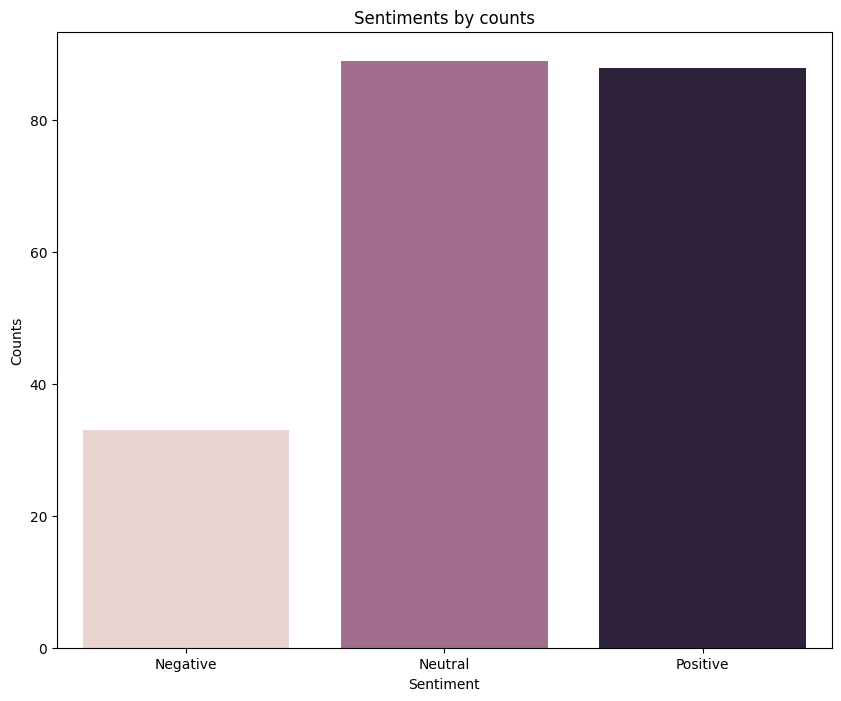

In [33]:
#a distribution plot firstly
plt.figure(figsize = (10,8))
counts = df1.label.value_counts()
#sns.countplot(x = 'label', data= df1)
ax = plt.gca()
sns.barplot(x = counts.index, y = counts, ax = ax , hue = counts.index, legend = False)
ax.set_xticklabels(['Negative','Neutral', 'Positive'])
ax.set_xlabel('Sentiment')
ax.set_ylabel('Counts')
plt.title('Sentiments by counts')
#plt.savefig('Sentiment_distribution28th.png')
plt.show()

C:\Users\Solomon\AppData\Local\Temp\ipykernel_13200\427650482.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Negative','Neutral', 'Positive'])


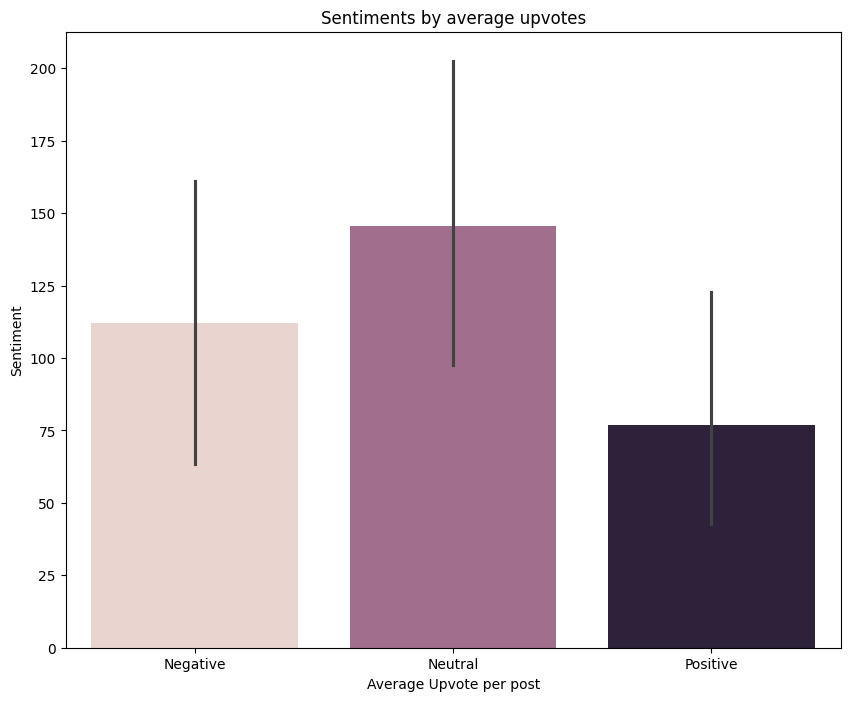

In [34]:
plt.figure(figsize = (10,8))
counts = df1.label.value_counts()
#sns.countplot(x = 'label', data= df1)
ax = plt.gca()
sns.barplot(x = 'label', y = 'Upvotes', ax = ax , hue = 'label', data = df1,estimator = "mean", legend = False)
ax.set_xticklabels(['Negative','Neutral', 'Positive'])
ax.set_ylabel('Sentiment')
ax.set_xlabel('Average Upvote per post')
plt.title('Sentiments by average upvotes')
#plt.savefig('Sentiment_upvote_plot28th.png')
plt.show()

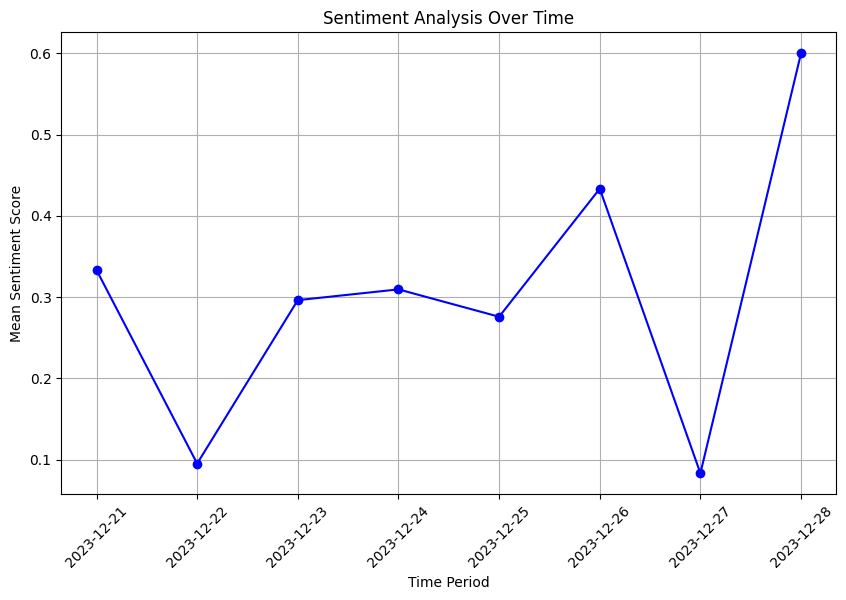

In [21]:
df3 = df1.groupby('Time').mean('label')
plt.figure(figsize=(10, 6))
plt.plot(df3.index, df3['label'], marker='o', linestyle='-', color='b')
plt.title('Sentiment Analysis Over Time')
plt.xticks(rotation = 45)
plt.xlabel('Time Period')
plt.ylabel('Mean Sentiment Score')
plt.grid(True)
plt.show()


In [24]:
!pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 660.6 kB/s eta 0:00:01
   --- ----------------------------------- 30.7/300.2 kB 660.6 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/300.2 kB 459.5 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/300.2 kB 547.6 kB/s eta 0:00:01
   ------------------------- ------------ 204.8/300.2 kB 655.1 kB/s eta 0:00:01
   ------------------------------- ------ 245.8/300.2 kB 718.0 kB/s eta 0:00:01
   -------------------------------------  297.0/300.2 kB 706.2 kB/s eta 0:00:01
   -------------------------------------  297.0/300.2 kB 706.2 kB/s eta 0:00:01
   -------------------------------------  297.0/300.2 kB 706.2 kB/s eta 0:00:01
   -------------------------------------  297.0/300.2 kB 706.2 kB/s eta 0:00:01
   -------------------------------------  297.0/300.2 kB 706.2 kB/s eta 0:00:01
   -------------------------------------  297.0/3

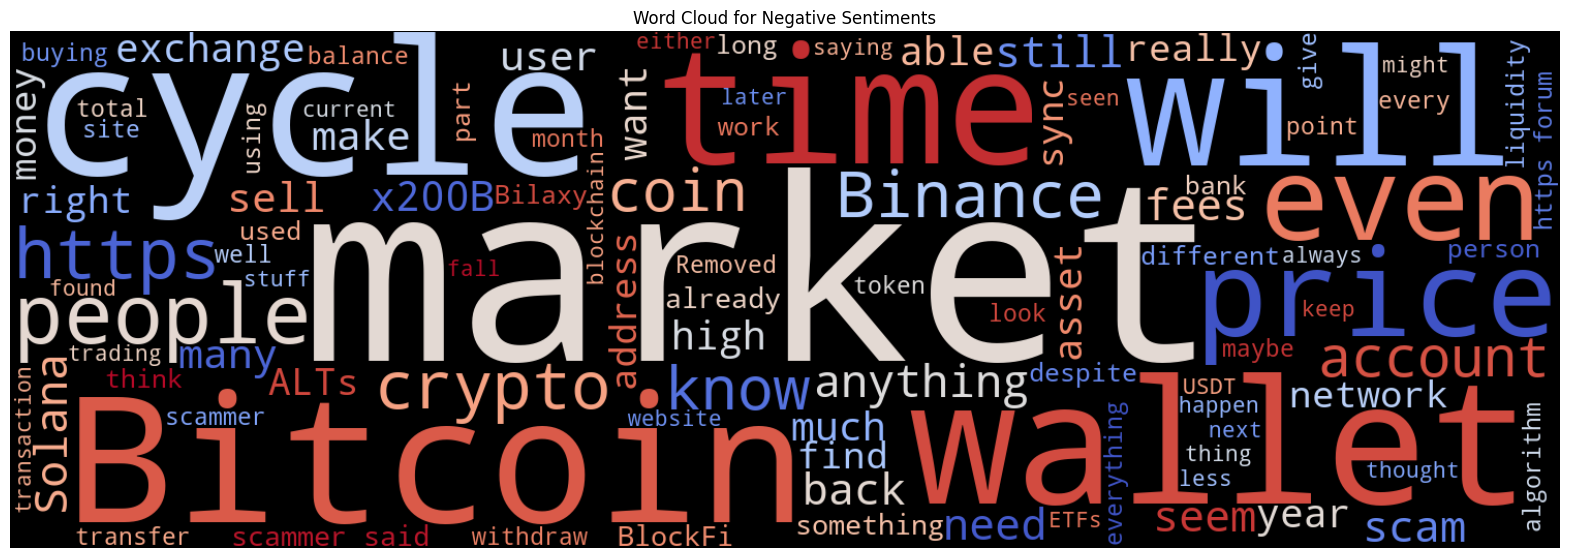

In [30]:
from wordcloud import WordCloud

fig = plt.figure(figsize= (20,20))
wc = WordCloud(max_words = 100, width = 1500, height = 500, min_word_length = 4, 
               colormap= "coolwarm").generate(" ". join(data_df[data_df.label == -1].Body))

plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")
plt.title("Word Cloud for Negative Sentiments")
plt.savefig("WordCloud_for_Negative_sentiments28th")

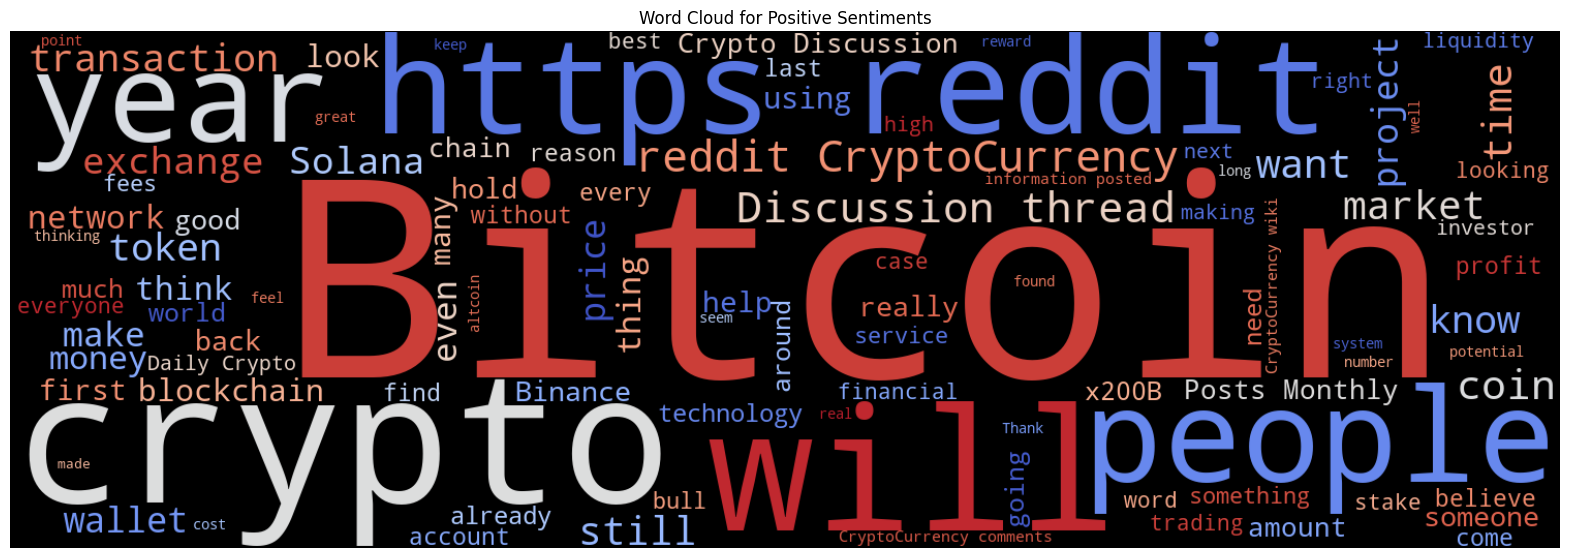

In [31]:
fig = plt.figure(figsize= (20,20))
wc = WordCloud(max_words = 100, width = 1500, height = 500, min_word_length = 4, 
               colormap= "coolwarm").generate(" ". join(data_df[data_df.label == 1].Body))

plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")
plt.title("Word Cloud for Positive Sentiments")
plt.savefig("WordCloud_for_Positive_sentiments28th")

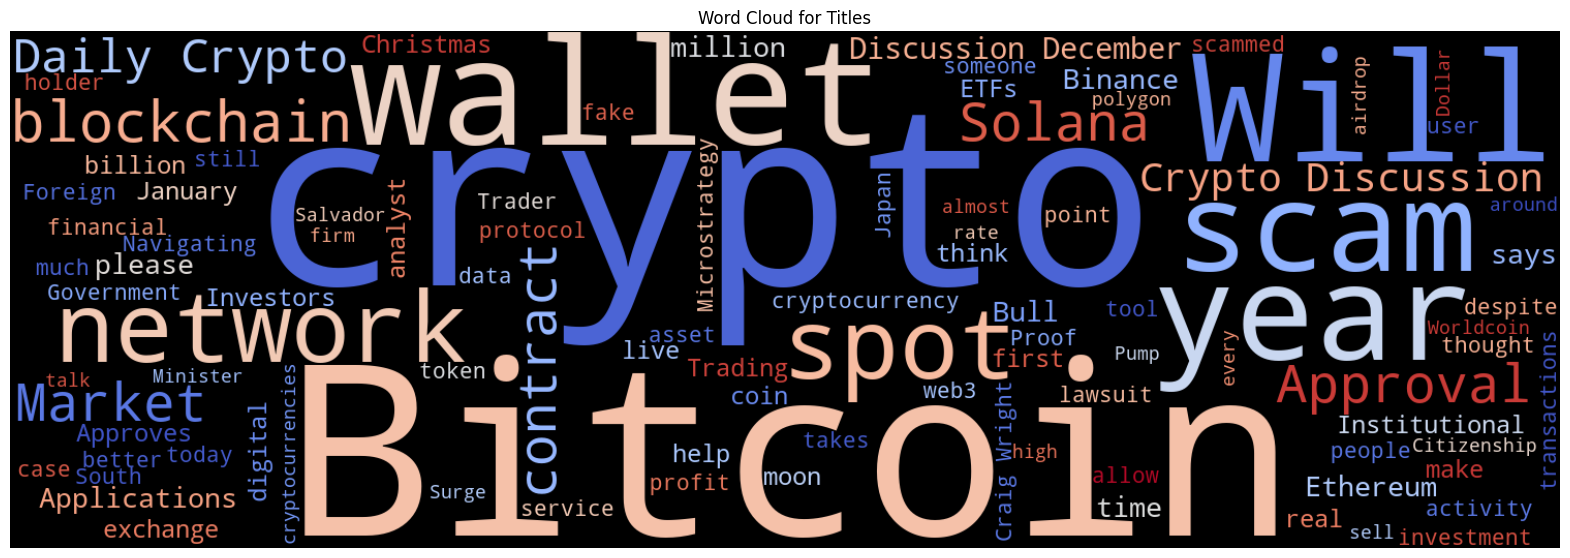

In [32]:
fig = plt.figure(figsize= (20,20))
wc = WordCloud(max_words = 100, width = 1500, height = 500, min_word_length = 4, 
               colormap= "coolwarm").generate(" ". join(data_df.Title))

plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")
plt.title("Word Cloud for Titles")
plt.savefig("WordCloud_for_Titles28th")